I always had trouble spelling *Dijkstra* correctly until someone pointed out "It's just D, followed by *i-j-k*, then stra". 
Once it was pointed out that *i-j-k* is represented sequentially in alphabetical order, spelling *Dijkstra* becomes trival - 
almost fun!


*Dijkstra's algorithm* is one of the most well-known and studied graph algorithms for finding the shortest path between a 
set of vertices. For a specified starting node, the algorithm finds the shortest path between the source vertex and all 
other vertices in the graph. Dijkstra's cannot handle graphs with negative edge weights: For graphs with negative 
weight edges, Floyd-Warshall or Bellman Ford can be used. But for graphs with positive edge weights, Dijkstra's has better 
worst case performance than more general alternatives (O((n + m)log(n)) for Dijkstra vs. O(mn) for Bellman-Ford and 
O(n^3) for Floyd-Warshall). 

However, Dijkstra's only returns a single shortest path. In many cases a single shortest path is enough. But there are 
plenty of applications in which knowledge of alternate minimum weight paths can be useful. If a graph has multiple shortest 
paths, it is necessary to add supplementary logic to identify and return all such paths. The modified routine to return all 
shortest paths from graph G is described below:

1. Run Dijkstra's starting from start node **a**. Returns shortest path and distance to every node from vertex **a**. 

2. Run Dijkstra's starting from end node **f**. Returns shortest path and distance to every node from vertex **f**.

3. Let `dist_a2f` = A shortest path from vertex **a** to vertex **f**. 

4. For (u, v) in G.edges:
        
    Let `w_uv` = Weight of edge (u, v).

    Let `dist_a2u` = Distance from start vertex **a** to vertex u.

    Let `dist_f2v` = Distance from end vertex **f** to vertex v. 
    
    If `dist_a2u` + `w_uv` + `dist_f2v` == `dist_a2f`:
    
    Then edge (u, v) is on some minimal weight path.


Lets use networkx to create a graph with multiple shortest paths:

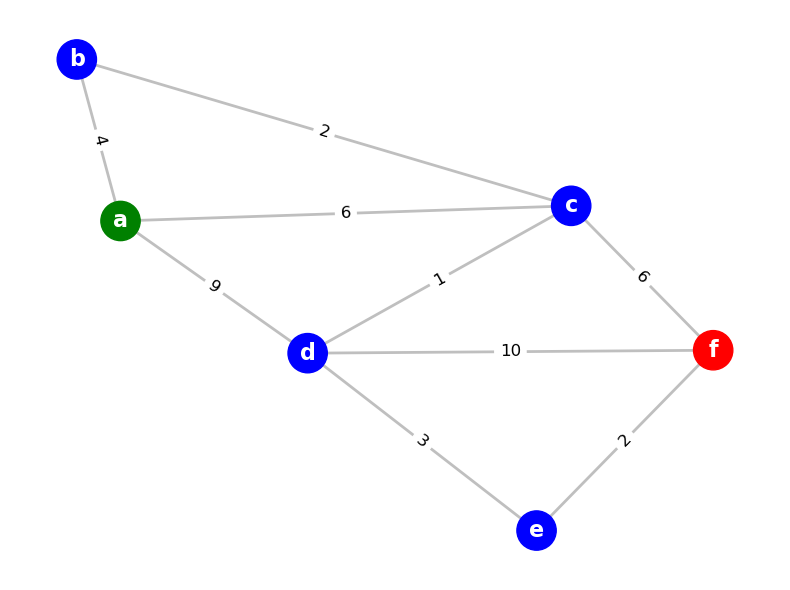

In [1]:

# Create network with multiple minimal weight paths.
import matplotlib.pyplot as plt
import networkx as nx

seed = 518
G = nx.Graph()

G.add_edge("a", "b", weight=4)
G.add_edge("b", "c", weight=2)
G.add_edge("a", "c", weight=6)
G.add_edge("c", "d", weight=1)
G.add_edge("d", "e", weight=3)
G.add_edge("e", "f", weight=2)
G.add_edge("c", "f", weight=6)
G.add_edge("a", "d", weight=9)
G.add_edge("f", "d", weight=10)

edges = [(u, v) for (u, v, d) in G.edges(data=True)]

color_map = []
for g in G:
    if g=="a":
        color_map.append("green")
    elif g=="f":
        color_map.append("red")
    else:
        color_map.append("blue")


# edge weight labels.
edge_labels = nx.get_edge_attributes(G, "weight")


fig, ax = plt.subplots(1, 1, figsize=(8, 6), tight_layout=True)
pos = nx.spring_layout(G, seed=seed)
nx.draw_networkx_nodes(G, pos, node_size=800, node_color=color_map)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, alpha=0.5, edge_color="grey", style="solid")
nx.draw_networkx_labels(G, pos, font_size=16, font_color="white", font_weight="bold", font_family="sans-serif")
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=12)
plt.axis("off")
plt.show();



G has three shortest paths of weight/distance 12:

- `a - c - f`
- `a - b - c - f`
- `a - c - d - e - f`

Running `single_source_dijkstra` from networkx returns the distance to each vertex in a graph from a specified starting 
vertex (in our example, vertex a). `single_source_dijkstra` returns two dictionaries: The first stores distances to each 
vertex; the second stores the shortest path from the start node to all other vertices (`d2v0` and `p2v0` in the code below):

In [2]:

d2v0, p2v0 = nx.single_source_dijkstra(G, "a")
print(f"d2v0: {d2v0}")
print(f"p2v0: {p2v0}")


d2v0: {'a': 0, 'b': 4, 'c': 6, 'd': 7, 'e': 10, 'f': 12}
p2v0: {'a': ['a'], 'b': ['a', 'b'], 'c': ['a', 'c'], 'd': ['a', 'c', 'd'], 'f': ['a', 'c', 'f'], 'e': ['a', 'c', 'd', 'e']}



`single_source_dijkstra` only returns `a - c - f`. To also identify `a - b - c - f` and `a - c - d - e - f`, we implement 
the steps from our pseudocode:

In [3]:

# Idenitfy all shortests paths in graph G.
all_shortest_paths = set()

# d2v: Distance to vertex (from start node a).
# p2v: Shortest path to vertext (from start node a).
d2v0, p2v0 = nx.single_source_dijkstra(G, "a")
d2v1, p2v1 = nx.single_source_dijkstra(G, "f")
all_shortest_paths.add(tuple(p2v0["f"]))

# Iterate through all edges. Check for additional shortest paths. 

# Distance of a shortest path from a to f. 
dist_a2f = d2v0["f"]

for u, v, dw in G.edges(data=True):
    
    # Get weight of current edge spanning (u, v)
    w_uv = dw["weight"]
    
    # Get distance from start vertex to u.
    dist_a2u = d2v0[u]
    
    # Get distance from end vertex to v.
    dist_f2v = d2v1[v]
    
    if dist_a2u + w_uv + dist_f2v == dist_a2f:
        
        # Edge uv is on some minimal weight path. Append to all_shortest_paths.
        pp = tuple(p2v0[u] + p2v1[v][::-1])
        all_shortest_paths.add(pp)


Shortest paths are stored in a set of ordered tuples, with each tuple representing the vertices of some path of minimum 
weight. Printing the contents of all_shortest_paths yields:

In [4]:
all_shortest_paths

{('a', 'b', 'c', 'f'), ('a', 'c', 'd', 'e', 'f'), ('a', 'c', 'f')}

The time complexity for two separate invocations of Dijkstra's is 2 * O((n + m)log(n)),  and O(m + n) to iterate through 
the adjacency list checking for intermediate edges falling on a path of minimum weight. 